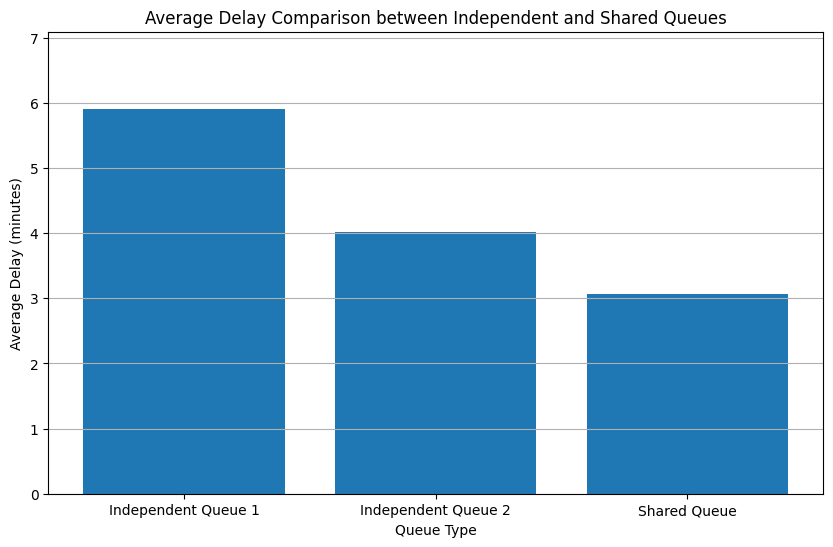

In [10]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

lambda_1 = 1/3
lambda_2 = 1/4
mu = 1/2
sim_time = 100000

ARRIVAL_1 = 0
ARRIVAL_2 = 1
DEPARTURE_1 = 2
DEPARTURE_2 = 3

def generate_arrival_times(lmbda, time):
    arrivals = []
    t = 0
    while t < time:
        t += np.random.exponential(1/lmbda)
        arrivals.append(t)
    return arrivals

def simulate_two_independent_queues():
    arrivals_1 = generate_arrival_times(lambda_1, sim_time)
    arrivals_2 = generate_arrival_times(lambda_2, sim_time)
    queue_1 = []
    queue_2 = []
    time_in_system_1 = []
    time_in_system_2 = []

    for arrival in arrivals_1:
        if queue_1 and queue_1[-1] > arrival:
            queue_1.append(queue_1[-1] + np.random.exponential(1/mu))
        else:
            queue_1.append(arrival + np.random.exponential(1/mu))
        time_in_system_1.append(queue_1[-1] - arrival)

    for arrival in arrivals_2:
        if queue_2 and queue_2[-1] > arrival:
            queue_2.append(queue_2[-1] + np.random.exponential(1/mu))
        else:
            queue_2.append(arrival + np.random.exponential(1/mu))
        time_in_system_2.append(queue_2[-1] - arrival)

    return np.mean(time_in_system_1), np.mean(time_in_system_2)

def simulate_shared_queue():
    arrivals_1 = generate_arrival_times(lambda_1, sim_time)
    arrivals_2 = generate_arrival_times(lambda_2, sim_time)
    events = [(t, ARRIVAL_1) for t in arrivals_1] + [(t, ARRIVAL_2) for t in arrivals_2]
    heapq.heapify(events)
    server_busy = [False, False]
    queue = []
    time_in_system = []

    while events:
        time, event_type = heapq.heappop(events)
        if event_type == ARRIVAL_1 or event_type == ARRIVAL_2:
            queue.append((time, event_type))
        elif event_type == DEPARTURE_1:
            server_busy[0] = False
        elif event_type == DEPARTURE_2:
            server_busy[1] = False

        if queue and not server_busy[0]:
            arrival_time, arrival_type = queue.pop(0)
            server_busy[0] = True
            departure_time = time + np.random.exponential(1/mu)
            heapq.heappush(events, (departure_time, DEPARTURE_1))
            time_in_system.append(departure_time - arrival_time)
        elif queue and not server_busy[1]:
            arrival_time, arrival_type = queue.pop(0)
            server_busy[1] = True
            departure_time = time + np.random.exponential(1/mu)
            heapq.heappush(events, (departure_time, DEPARTURE_2))
            time_in_system.append(departure_time - arrival_time)

    return np.mean(time_in_system)

avg_delay_independent_1, avg_delay_independent_2 = simulate_two_independent_queues()
avg_delay_shared = simulate_shared_queue()

labels = ['Independent Queue 1', 'Independent Queue 2', 'Shared Queue']
avg_delays = [avg_delay_independent_1, avg_delay_independent_2, avg_delay_shared]

plt.figure(figsize=(10, 6))
plt.bar(labels, avg_delays)
plt.xlabel('Queue Type')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay Comparison between Independent and Shared Queues')
plt.ylim(0, max(avg_delays) * 1.2)
plt.grid(axis='y')
plt.savefig("q2.pdf")
plt.show()

